In [22]:
import pandas as pd
import openpyxl 
from datetime import datetime 
from scipy.stats import kurtosis
import numpy as np 
import pylab as p 

In [23]:
#get the sorted fin file 
fin_file = pd.ExcelFile(r"..\Sray\fin concate esg\AU_bloom_fin_esg.xlsx")

findata_sheet = pd.read_excel(fin_file, sheet_name="fin_esg", index_col=0, header=0)

fin_data = pd.DataFrame(findata_sheet)

fin_data.head() 


,Year,Dates,Tkr & Exch,Name,Sec_no,PX_LAST,HISTORICAL_MARKET_CAP,TRAIL_12M_SALES_PER_SH,IS_EPS,CF_FREE_CASH_FLOW,PE_RATIO,RETURN_COM_EQY,RETURN_ON_ASSET,VOLATILITY_180D,VOLATILITY_360D,BETA_RAW_OVERRIDABLE,esg,g,s,e
firm no,,,,,,,,,,,,,,,,,,,,
1,2017,2017-12-31,BKW AU Equity,BRICKWORKS LTD,2.0,14.21,2106.1474,5.4231,0.6500,48.453,11.8356,9.1476,6.6192,19.025,19.277,1.4001,25.570868,63.576160,11.396614,1.600725
1,2017,2017-12-29,BKW AU Equity,BRICKWORKS LTD,2.0,14.87,1956.7257,5.6469,0.5506,40.789,11.9092,9.7842,7.1112,19.818,19.340,1.1800,25.570868,63.576160,11.396614,1.600725
1,2018,2018-12-31,BKW AU Equity,BRICKWORKS LTD,2.0,18.38,2446.5306,5.5502,0.7660,47.128,11.9589,9.3071,6.6675,22.331,20.029,0.9532,27.462027,63.576160,12.031439,6.644518
1,2019,2019-12-31,BKW AU Equity,BRICKWORKS LTD,2.0,13.21,2966.1299,6.1702,0.3880,-75.080,17.3853,4.5509,3.1119,33.956,27.923,1.1518,34.825470,69.837448,23.579203,10.933253
1,2020,2020-12-31,BKW AU Equity,BRICKWORKS LTD,2.0,18.68,2804.7458,6.1899,0.4730,14.762,8.7052,13.6242,8.8623,25.609,32.048,1.0724,36.636154,69.837448,23.579203,16.369677


In [24]:
print (fin_data.columns)

Index(['Year', 'Dates', 'Tkr & Exch', 'Name', 'Sec_no', 'PX_LAST',
       'HISTORICAL_MARKET_CAP', 'TRAIL_12M_SALES_PER_SH', 'IS_EPS',
       'CF_FREE_CASH_FLOW', 'PE_RATIO', 'RETURN_COM_EQY', 'RETURN_ON_ASSET',
       'VOLATILITY_180D', 'VOLATILITY_360D', 'BETA_RAW_OVERRIDABLE', 'esg',
       'g', 's', 'e'],
      dtype='object')


In [25]:
fin_data ['es'] = fin_data['e'] * fin_data['s']
fin_data ['eg'] = fin_data['e'] * fin_data['g']
fin_data ['sg'] = fin_data['s'] * fin_data['g']
fin_data['esg_cubic'] = fin_data['esg']**3

In [26]:
fin_data = fin_data.rename({'Name': 'firm_name',
                            'Tkr & Exch': 'tkr',
                            'Sec_no': 'sec_no',
                            'Dates': 'date',
                            'Year':'Year'.lower(),
                            'PE_RATIO': 'pe',
                            'BETA_RAW_OVERRIDABLE': 'beta',
                            'CF_FREE_CASH_FLOW': 'fcf',
                            'RETURN_ON_ASSET': 'roa',
                            'PX_LAST': 'px', 
                            'HISTORICAL_MARKET_CAP': 'HISTORICAL_MARKET_CAP'.lower(), 
                            'TRAIL_12M_SALES_PER_SH': 'TRAIL_12M_SALES_PER_SH'.lower(), 
                            'IS_EPS': 'IS_EPS'.lower(),
                            'RETURN_COM_EQY': 'RETURN_COM_EQY'.lower(),
                            'VOLATILITY_360D':'VOLATILITY_360D'.lower()}, axis=1)
fin_data.head()

,year,date,tkr,firm_name,sec_no,px,historical_market_cap,trail_12m_sales_per_sh,is_eps,fcf,...,volatility_360d,beta,esg,g,s,e,es,eg,sg,esg_cubic
firm no,,,,,,,,,,,,,,,,,,,,,
1,2017,2017-12-31,BKW AU Equity,BRICKWORKS LTD,2.0,14.21,2106.1474,5.4231,0.6500,48.453,...,19.277,1.4001,25.570868,63.576160,11.396614,1.600725,18.242846,101.767953,724.552965,16720.004405
1,2017,2017-12-29,BKW AU Equity,BRICKWORKS LTD,2.0,14.87,1956.7257,5.6469,0.5506,40.789,...,19.340,1.1800,25.570868,63.576160,11.396614,1.600725,18.242846,101.767953,724.552965,16720.004405
1,2018,2018-12-31,BKW AU Equity,BRICKWORKS LTD,2.0,18.38,2446.5306,5.5502,0.7660,47.128,...,20.029,0.9532,27.462027,63.576160,12.031439,6.644518,79.943111,422.432936,764.912685,20710.841748
1,2019,2019-12-31,BKW AU Equity,BRICKWORKS LTD,2.0,13.21,2966.1299,6.1702,0.3880,-75.080,...,27.923,1.1518,34.825470,69.837448,23.579203,10.933253,257.797395,763.550509,1646.711342,42236.795203
1,2020,2020-12-31,BKW AU Equity,BRICKWORKS LTD,2.0,18.68,2804.7458,6.1899,0.4730,14.762,...,32.048,1.0724,36.636154,69.837448,23.579203,16.369677,385.983922,1143.216440,1646.711342,49173.331629


In [27]:
fin_data['date'] = fin_data['date'].astype('datetime64')
fin_data.dtypes

year                               int64
date                      datetime64[ns]
tkr                               object
firm_name                         object
sec_no                           float64
px                               float64
historical_market_cap            float64
trail_12m_sales_per_sh           float64
is_eps                           float64
fcf                              float64
pe                               float64
return_com_eqy                   float64
roa                              float64
VOLATILITY_180D                  float64
volatility_360d                  float64
beta                             float64
esg                              float64
g                                float64
s                                float64
e                                float64
es                               float64
eg                               float64
sg                               float64
esg_cubic                        float64
dtype: object

In [31]:
sectors = []
sectors = (fin_data['sec_no'].drop_duplicates()).to_list()
print(sectors)
len(sectors)

[2.0, 4.0, nan, 9.0, 5.0, 6.0, 8.0, 7.0, 11.0, 1.0, 3.0, 10.0, 12.0]


13

In [125]:
#initial_year=2017
#stop_year=2020
#start_date = '01-'+ str(initial_year) 
#end_date = '12-'+ str(initial_year) 
#print(start_date)
#print(end_date)
    

#temp_dataframe = fin_data.loc[(fin_data['sec_no']==1) & (fin_data['date']>=start_date) & (fin_data['date']<=end_date)].copy()
#temp_dataframe

## **Add new indicators** 

In [ ]:
# companies_sec = []
# initial_year = 2017
# stop_year = 2023

# for year in range(initial_year, stop_year+1, 1):

#     start_date = '01-' + str(year)
#     if (year < 2021):
#         end_date = '12-' + str(year)
#     elif (year == 2021):
#         end_date = '02-' + str(year)

#     for month in range(1, 13):
#         m = str(month)
#         if (month < 10):
#             start_date = '0' + m + '-' + str(year)
#         else:
#             start_date = m + '-' + str(year)

#         for k in range(len(sectors)):

#             # temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['date']>=start_date) & (fin_data['date']<=end_date)].copy()
#             temp_dataframe = fin_data.loc[(
#                 fin_data['sec_no'] == k+1) & (fin_data['date'] == start_date)].copy()
#         print(temp_dataframe)


In [32]:
#seperate each of the companies and store into list companies_financial=[]

# temp_dataframe2 = temp_dataframe.loc[fin_data['date']== (str(m)+ '-' + str(year)) ].copy()

#initialize counter to track the number of company
companies_sec=[]
initial_year=2017
stop_year=2023

for year in range(initial_year,stop_year+1,1):    

    # start_date = '01-'+ str(year) 
    # if (year <2021):
    #     end_date = '12-'+ str(year) 
    # elif (year==2021):    
    #     end_date = '02-'+ str(year) 

    # for month in range (1,13):
    #     m=str(month)
    #     if (month<10):
    #         start_date = '0'+ m + '-' + str(year) 
    #     else:
    #         start_date = m + '-' + str(year)  

    
        for k in range (len(sectors)):
        
            # temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['date']>=start_date) & (fin_data['date']<=end_date)].copy()
            temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['year']==initial_year)].copy()

            
            temp_dataframe['ep_sec_mean']= temp_dataframe['ep'].mean()

            temp_dataframe['ep_sec_sd']= temp_dataframe['ep'].std()

            temp_dataframe['sp_sec_mean'] = temp_dataframe['sp'].mean()

            temp_dataframe['sp_sec_sd'] = temp_dataframe['sp'].std()

            temp_dataframe['cfp_sec_mean'] = temp_dataframe['cfp'].mean()

            temp_dataframe['cfp_sec_sd'] = temp_dataframe['cfp'].std()

            temp_dataframe['roa_sec_mean'] = temp_dataframe['roa'].mean()

            temp_dataframe['roa_sec_sd'] = temp_dataframe['roa'].std()

            companies_sec.append(temp_dataframe)



KeyError: 'ep'

In [128]:
#combine all the data 
new_companies_data = pd.concat(companies_sec)
new_companies_data

,tkr,firmname,sec_no,date,esg_sray,e,s,g,es,eg,...,sp,cfp,ep_sec_mean,ep_sec_sd,sp_sec_mean,sp_sec_sd,cfp_sec_mean,cfp_sec_sd,roa_sec_mean,roa_sec_sd
528,CD SP Equity,COMFORTDELGRO CORP LTD,3,2017-01-01,54.70,60.41,58.16,74.26,3513.4456,4486.0466,...,0.000000,0.000000,0.055642,0.021225,0.000000,0.000000,0.000000,0.000000,NaN,NaN
576,COS SP Equity,COSCO SHIPPING INTERNATIONAL,3,2017-01-01,60.00,73.34,60.82,29.06,4460.5388,2131.2604,...,NaN,NaN,0.055642,0.021225,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1344,HPHT SP Equity,HUTCHISON PORT HOLDINGS TR-U,3,2017-01-01,55.45,67.88,60.81,50.92,4127.7828,3456.4496,...,0.000000,0.000000,0.055642,0.021225,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1488,KEP SP Equity,KEPPEL CORP LTD,3,2017-01-01,56.94,37.28,54.21,29.58,2020.9488,1102.7424,...,0.000000,0.000000,0.055642,0.021225,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2160,SATS SP Equity,SATS LTD,3,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.055642,0.021225,0.000000,0.000000,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,M1 SP Equity,M1 LIMITED,12,2020-12-01,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.071628,0.068571,80.693494,166.040399,2.532146,31.472925,-3.189329,22.262106
1871,OMH AU Equity,OM HOLDINGS LTD,12,2020-12-01,33.93,31.90,48.64,25.62,1551.6160,817.2780,...,0.000000,0.000000,0.071628,0.068571,80.693494,166.040399,2.532146,31.472925,-3.189329,22.262106
2063,PREIT SP Equity,PARKWAY LIFE REAL ESTATE INVESTMENT TRUST,12,2020-12-01,45.81,37.88,39.22,NaN,1485.6536,NaN,...,7.382171,5.215762,0.071628,0.068571,80.693494,166.040399,2.532146,31.472925,-3.189329,22.262106
2687,STH SP Equity,STARHUB LTD,12,2020-12-01,57.16,66.44,62.43,50.46,4147.8492,3352.5624,...,455.954198,67.709924,0.071628,0.068571,80.693494,166.040399,2.532146,31.472925,-3.189329,22.262106


In [129]:
new_companies_data.columns

Index(['tkr', 'firmname', 'sec_no', 'date', 'esg_sray', 'e', 's', 'g', 'es',
       'eg', 'sg', 'esg_cubic', 'vol_90d', 'vol_30d', 'vol_180d', 'mv', 'roa',
       'beta', 'mv_bv', 'leverage', 'vol_60d', 'pe', 'roe', 'volume', 'sales',
       'px', 'fcf', 'ret', 'ep', 'sp', 'cfp', 'ep_sec_mean', 'ep_sec_sd',
       'sp_sec_mean', 'sp_sec_sd', 'cfp_sec_mean', 'cfp_sec_sd',
       'roa_sec_mean', 'roa_sec_sd'],
      dtype='object')

In [130]:
try:
    new_companies_data['ep_z'] = new_companies_data.apply(
        lambda row: (row.ep - row.ep_sec_mean)/row.ep_sec_sd, axis=1)
except ZeroDivisionError:
    new_companies_data['ep_z'] = np.nan

try:
    new_companies_data['sp_z'] = new_companies_data.apply(
        lambda row: (row.sp - row.sp_sec_mean)/row.sp_sec_sd, axis=1)
except ZeroDivisionError:
    new_companies_data['sp_z'] = np.nan

try:
    new_companies_data['cfp_z'] = new_companies_data.apply(
        lambda row: (row.cfp - row.cfp_sec_mean)/row.cfp_sec_sd, axis=1)
except ZeroDivisionError:
    new_companies_data['cfp_z'] = np.nan


#read the column FROM ep_z to cfp_z
col = new_companies_data.loc[:, "ep_z":"cfp_z"]
new_companies_data['value'] = col.mean(axis=1)

try:
    new_companies_data['roa_z'] = new_companies_data.apply(
        lambda row: (row.roa - row.roa_sec_mean)/row.roa_sec_sd, axis=1)
except ZeroDivisionError:
    new_companies_data['roa_z'] = np.nan

try:
    new_companies_data['esg_value'] = new_companies_data.apply(
        lambda row: (row.esg_sray + row.value)/2, axis=1)
except ZeroDivisionError:
    new_companies_data['esg_value'] = np.nan


In [131]:
new_companies_data['sp_z']

528    NaN
576    NaN
1344   NaN
1488   NaN
2160   NaN
        ..
1679   NaN
1871   NaN
2063   NaN
2687   NaN
2927   NaN
Name: sp_z, Length: 3072, dtype: float64

In [132]:

#sorting the company
new_companies_data['date'] = pd.to_datetime(
    new_companies_data['date'], format='%m%Y', errors='coerce').dt.to_period('m')

new_companies_data = new_companies_data.sort_values(
    by=["sec_no", "firmname", "date"])

#arrange according to the Portfolio-no normalization
new_companies_data = new_companies_data[['firmname', 'tkr', 'sec_no',
                                            'date', 'esg_sray', 'e', 's', 
                                            'g', 'es', 'eg', 'sg', 'esg_cubic', 
                                            'px', 'mv', 'volume', 'fcf', 'vol_90d', 
                                            'roe', 'pe', 'vol_30d', 'vol_60d', 'beta', 
                                            'roa', 'vol_180d', 'sales', 'mv_bv', 'leverage',
                                            'ret', 'ep', 'ep_sec_mean', 'ep_sec_sd', 'ep_z', 
                                            'sp', 'sp_sec_mean', 'sp_sec_sd', 'sp_z', 
                                            'cfp', 'cfp_sec_mean', 'cfp_sec_sd', 'cfp_z', 
                                            'value', 'roa_sec_mean', 'roa_sec_sd', 'roa_z', 'esg_value']]

new_companies_data


,firmname,tkr,sec_no,date,esg_sray,e,s,g,es,eg,...,sp_z,cfp,cfp_sec_mean,cfp_sec_sd,cfp_z,value,roa_sec_mean,roa_sec_sd,roa_z,esg_value
528,COMFORTDELGRO CORP LTD,CD SP Equity,3,2017-01,54.70,60.41,58.16,74.26,3513.4456,4486.0466,...,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
529,COMFORTDELGRO CORP LTD,CD SP Equity,3,2017-02,52.64,57.50,54.86,74.24,3154.4500,4268.8000,...,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
530,COMFORTDELGRO CORP LTD,CD SP Equity,3,2017-03,52.67,57.90,54.74,74.66,3169.4460,4322.8140,...,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
531,COMFORTDELGRO CORP LTD,CD SP Equity,3,2017-04,52.60,57.90,54.08,75.27,3131.2320,4358.1330,...,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
532,COMFORTDELGRO CORP LTD,CD SP Equity,3,2017-05,52.62,57.90,54.06,75.29,3130.0740,4359.2910,...,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,WAVE LIFE SCIENCES LTD,WVE US Equity,12,2020-08,46.41,40.44,48.53,46.88,1962.5532,1895.8272,...,NaN,-2.315802,1.041624,2.370548,NaN,NaN,-1.693183,22.552933,-2.007824,NaN
2924,WAVE LIFE SCIENCES LTD,WVE US Equity,12,2020-09,46.42,40.51,48.54,46.88,1966.3554,1899.1088,...,NaN,-3.160542,6.614288,23.407129,NaN,NaN,-5.879333,26.162229,-2.013478,NaN
2925,WAVE LIFE SCIENCES LTD,WVE US Equity,12,2020-10,41.67,40.51,48.52,36.30,1965.5452,1470.5130,...,NaN,-4.751061,-27.446841,96.253030,NaN,NaN,-7.373971,30.785911,-2.248640,NaN
2926,WAVE LIFE SCIENCES LTD,WVE US Equity,12,2020-11,41.60,40.46,48.40,36.26,1958.2640,1467.0796,...,NaN,7.876644,-2.235069,23.413931,NaN,NaN,-2.130143,18.830994,-2.208835,NaN


In [133]:
new_companies_data.to_excel("SG_fin_data_portfolio.xlsx", sheet_name="main")

## **Descriptive Section**

In [134]:
#Descriptive statistics for e, s, g, esg, ret, value_z, roa_z, vol_90d, vol_180d
describe_df= new_companies_data.describe(include="all")
print(describe_df)
describe_df.to_excel("SG_Descriptive Statistics.xlsx", sheet_name="main")

               firmname            tkr       sec_no     date     esg_sray  \
count              3072           3072  3072.000000     3072  2146.000000   
unique               64             64          NaN       48          NaN   
top     KEPPEL CORP LTD  COS SP Equity          NaN  2017-01          NaN   
freq                 48             48          NaN       64          NaN   
mean                NaN            NaN     8.109375      NaN    52.667116   
std                 NaN            NaN     3.322425      NaN     7.456461   
min                 NaN            NaN     3.000000      NaN    27.980000   
25%                 NaN            NaN     5.000000      NaN    47.782500   
50%                 NaN            NaN     9.500000      NaN    52.945000   
75%                 NaN            NaN    11.000000      NaN    57.740000   
max                 NaN            NaN    12.000000      NaN    69.900000   

                  e            s            g           es           eg  ..

## **Total number of companies in each sector**

In [135]:
print(new_companies_data.groupby('sec_no')['tkr'].nunique())

sec_no
3     10
4      3
5      7
6      3
7      5
8      2
9      2
10     9
11    11
12    12
Name: tkr, dtype: int64


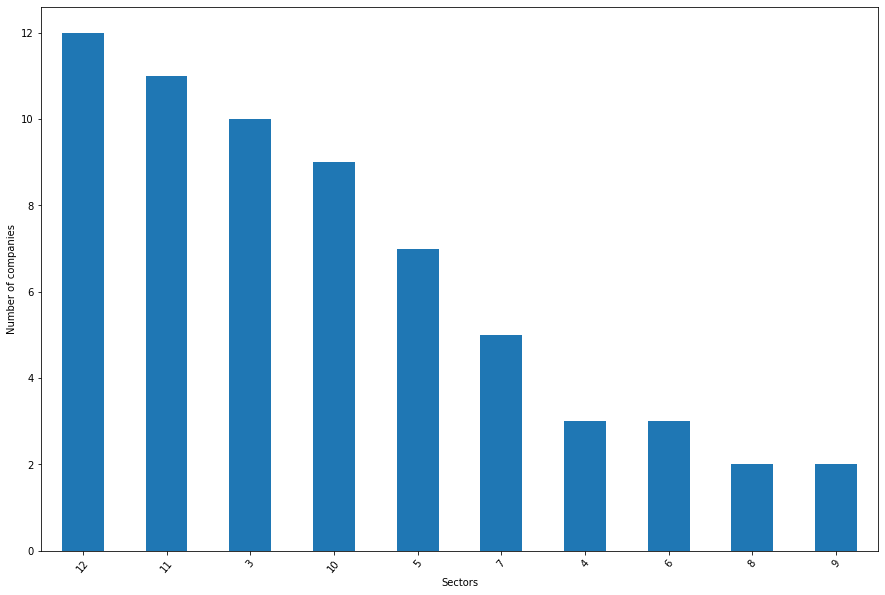

In [136]:
from matplotlib import pyplot as plt
sec_no= new_companies_data.groupby('sec_no')['tkr'].nunique()
plt.figure(figsize=(15,10))
sec_no.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Sectors")
plt.ylabel("Number of companies")
plt.show()

## **Kurtosis**

In [137]:
new_companies_data.drop(['date', 'firmname','tkr','sec_no' ], axis=1, inplace=True)

In [138]:
new_companies_data['px'] = new_companies_data['px'] .astype(float)
new_companies_data.dtypes

esg_sray        float64
e               float64
s               float64
g               float64
es              float64
eg              float64
sg              float64
esg_cubic       float64
px              float64
mv              float64
volume          float64
fcf             float64
vol_90d         float64
roe             float64
pe              float64
vol_30d         float64
vol_60d         float64
beta            float64
roa             float64
vol_180d        float64
sales           float64
mv_bv           float64
leverage        float64
ret             float64
ep              float64
ep_sec_mean     float64
ep_sec_sd       float64
ep_z            float64
sp              float64
sp_sec_mean     float64
sp_sec_sd       float64
sp_z            float64
cfp             float64
cfp_sec_mean    float64
cfp_sec_sd      float64
cfp_z           float64
value           float64
roa_sec_mean    float64
roa_sec_sd      float64
roa_z           float64
esg_value       float64
dtype: object

In [139]:
print( '\nKurtosis for normal distribution :', 
      kurtosis(new_companies_data, fisher = True))


Kurtosis for normal distribution : [         nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan  20.71043566
  31.82039794          nan          nan 153.54288081 134.67441453
          nan          nan          nan          nan          nan
          nan]
